In [28]:
#Including the required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading of data
db=pd.read_csv("diabetes2.csv")

In [3]:
#visualizing the description of the data
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#checking for null values
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

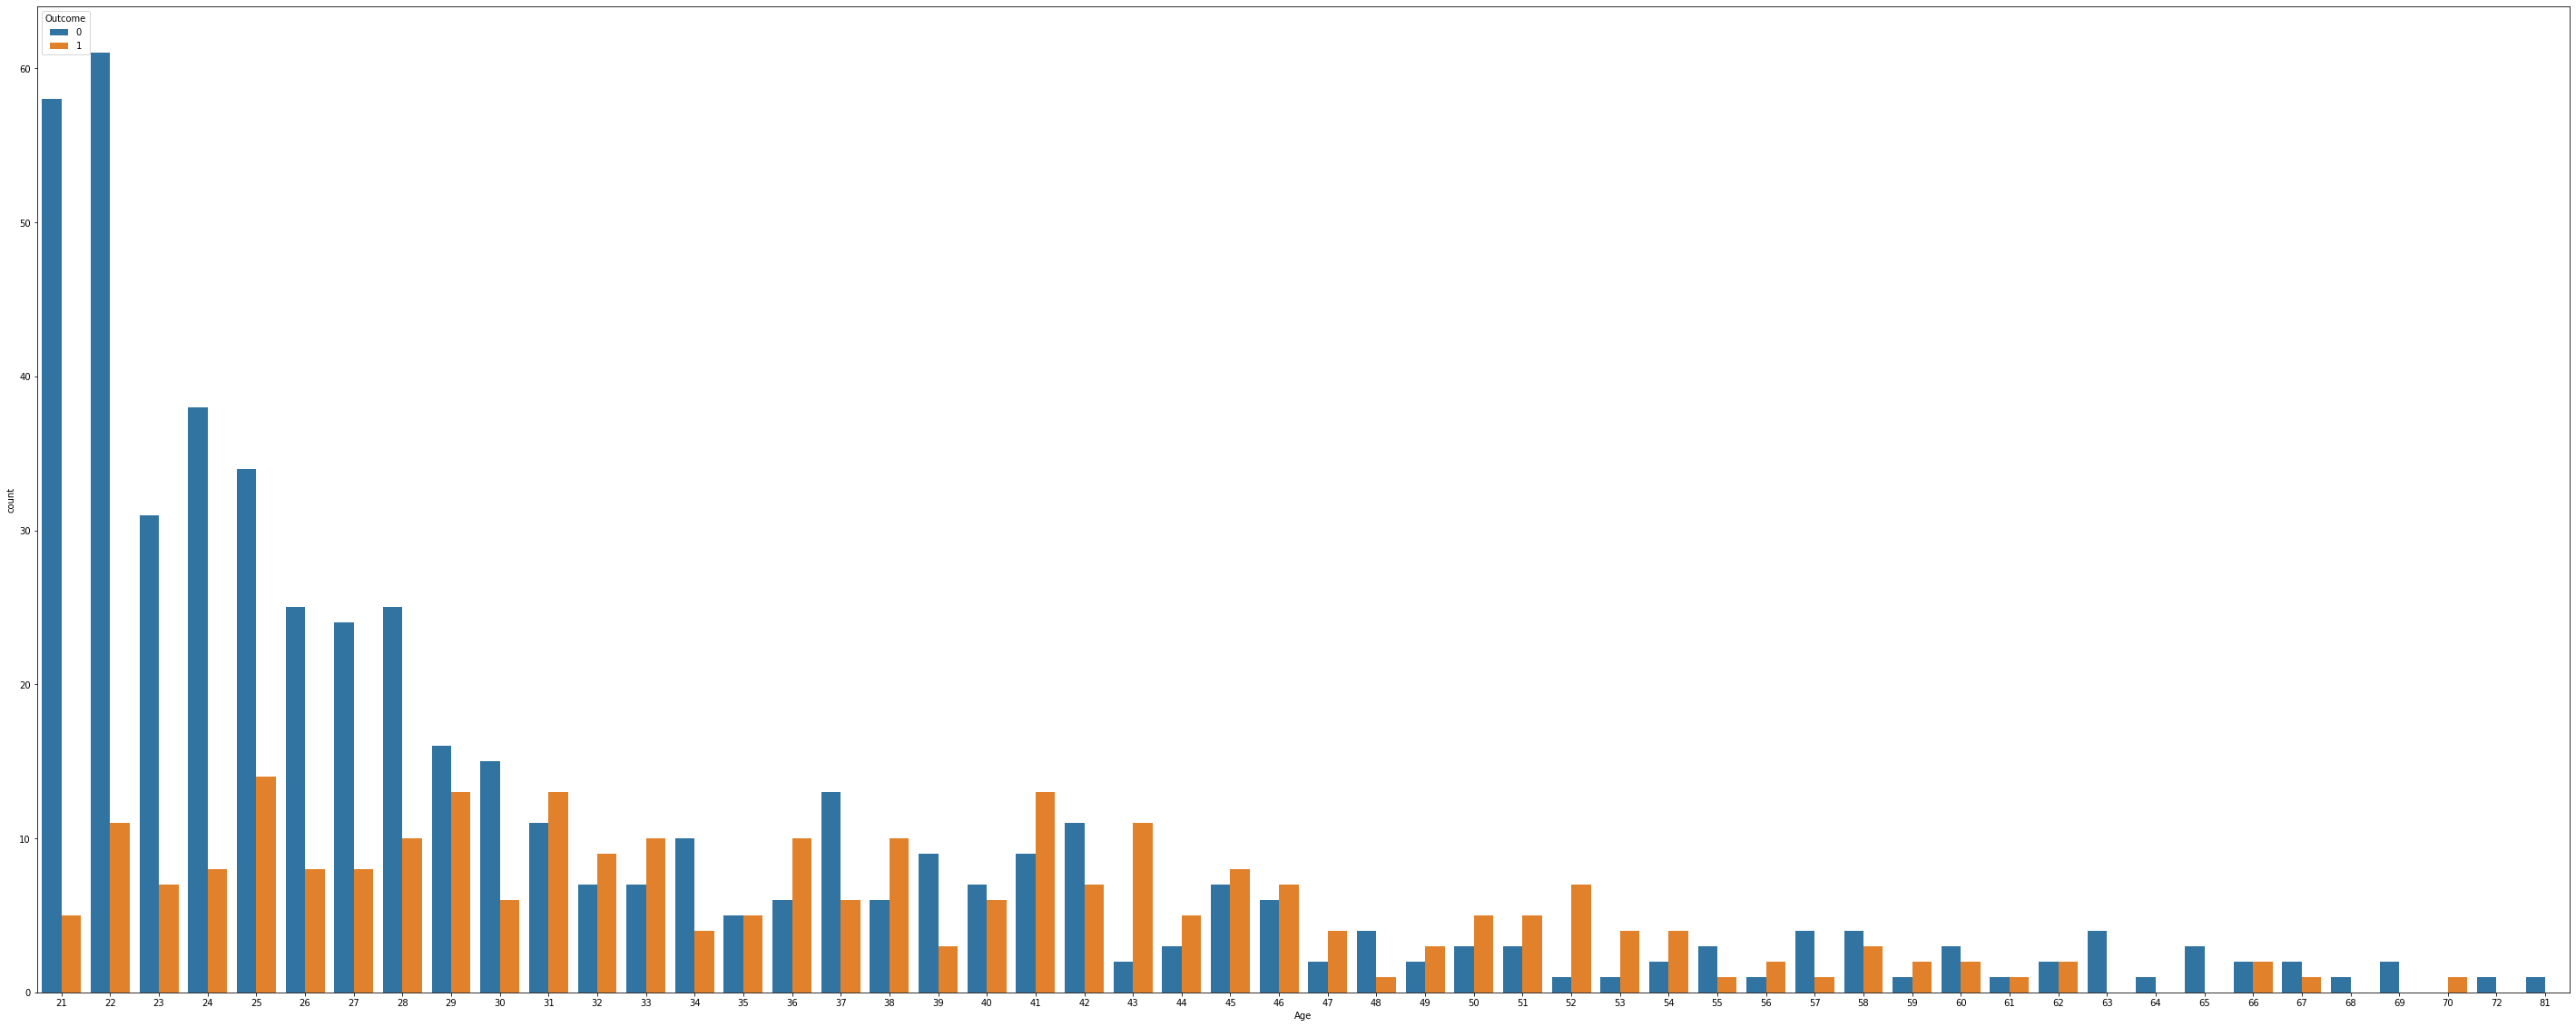

In [6]:
plt.figure(figsize=(50,20))
sns.countplot(db['Age'],hue=db["Outcome"])

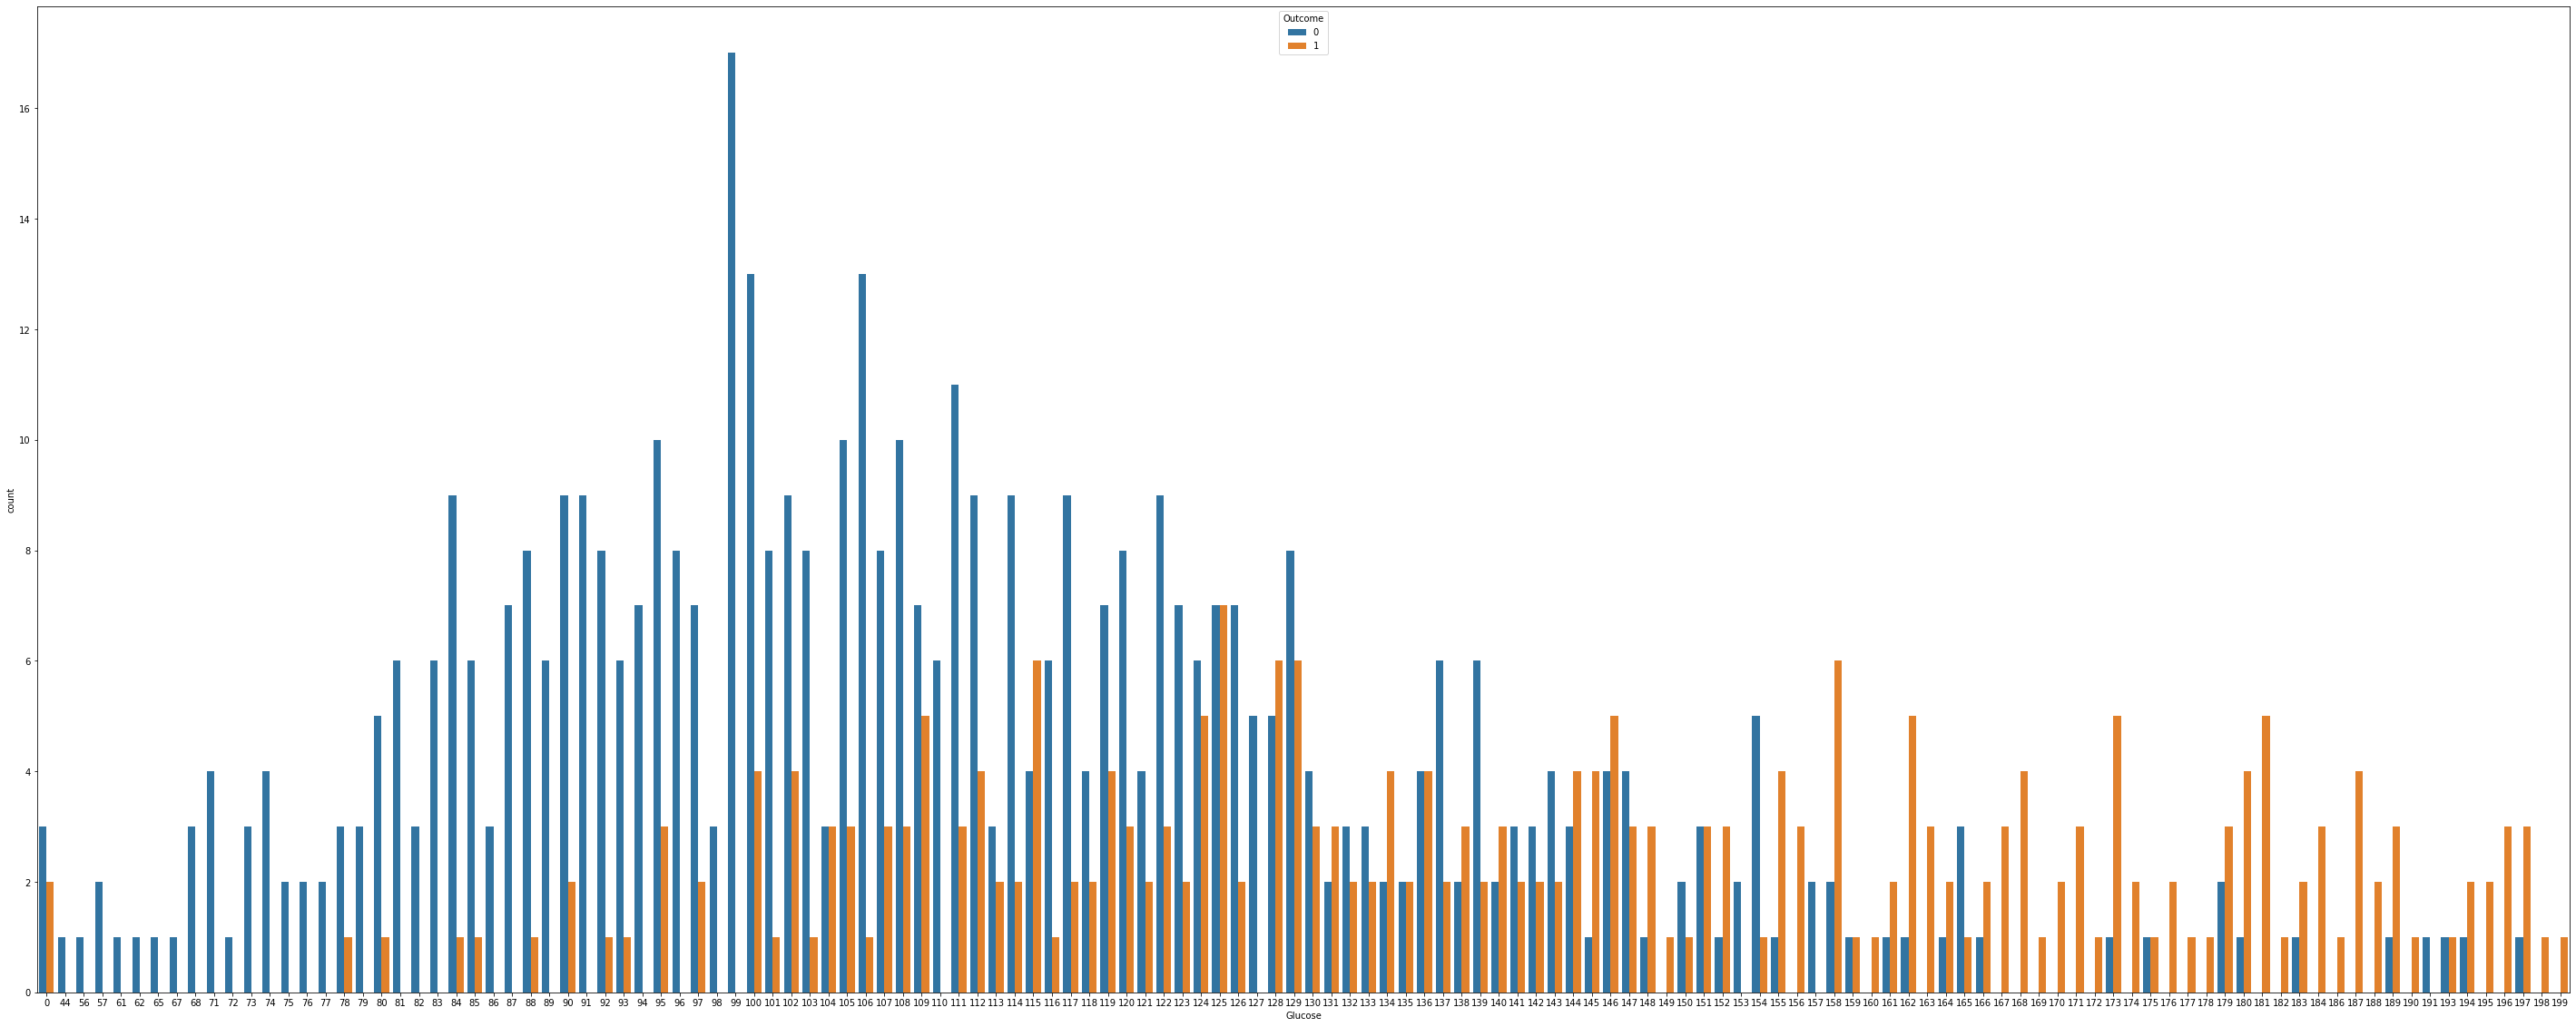

In [7]:
plt.figure(figsize=(50,20))
sns.countplot(db['Glucose'],hue=db["Outcome"])

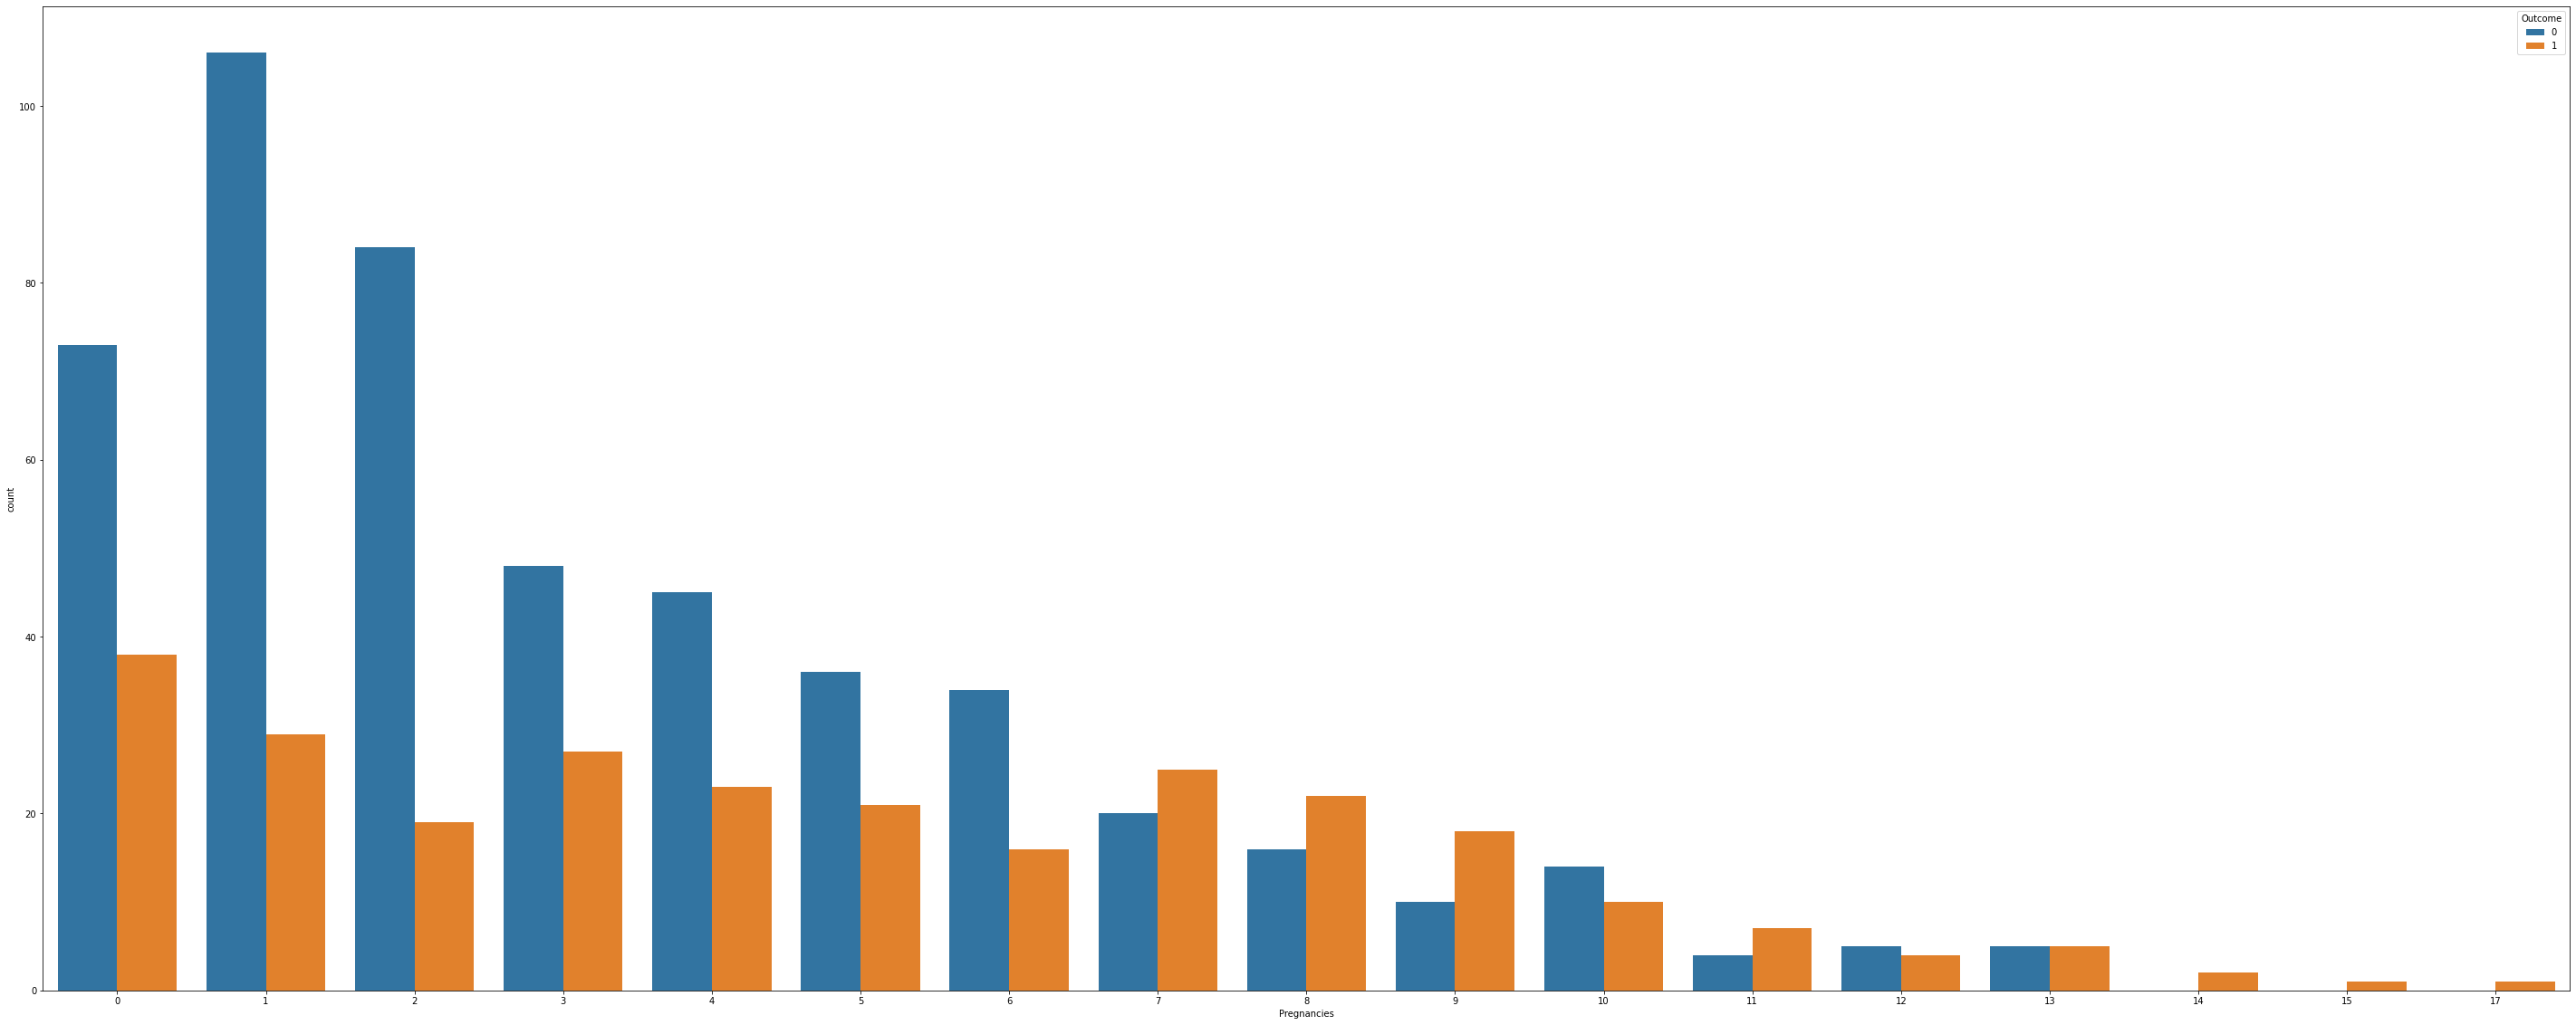

In [8]:
plt.figure(figsize=(50,20))
sns.countplot(db['Pregnancies'],hue=db["Outcome"])

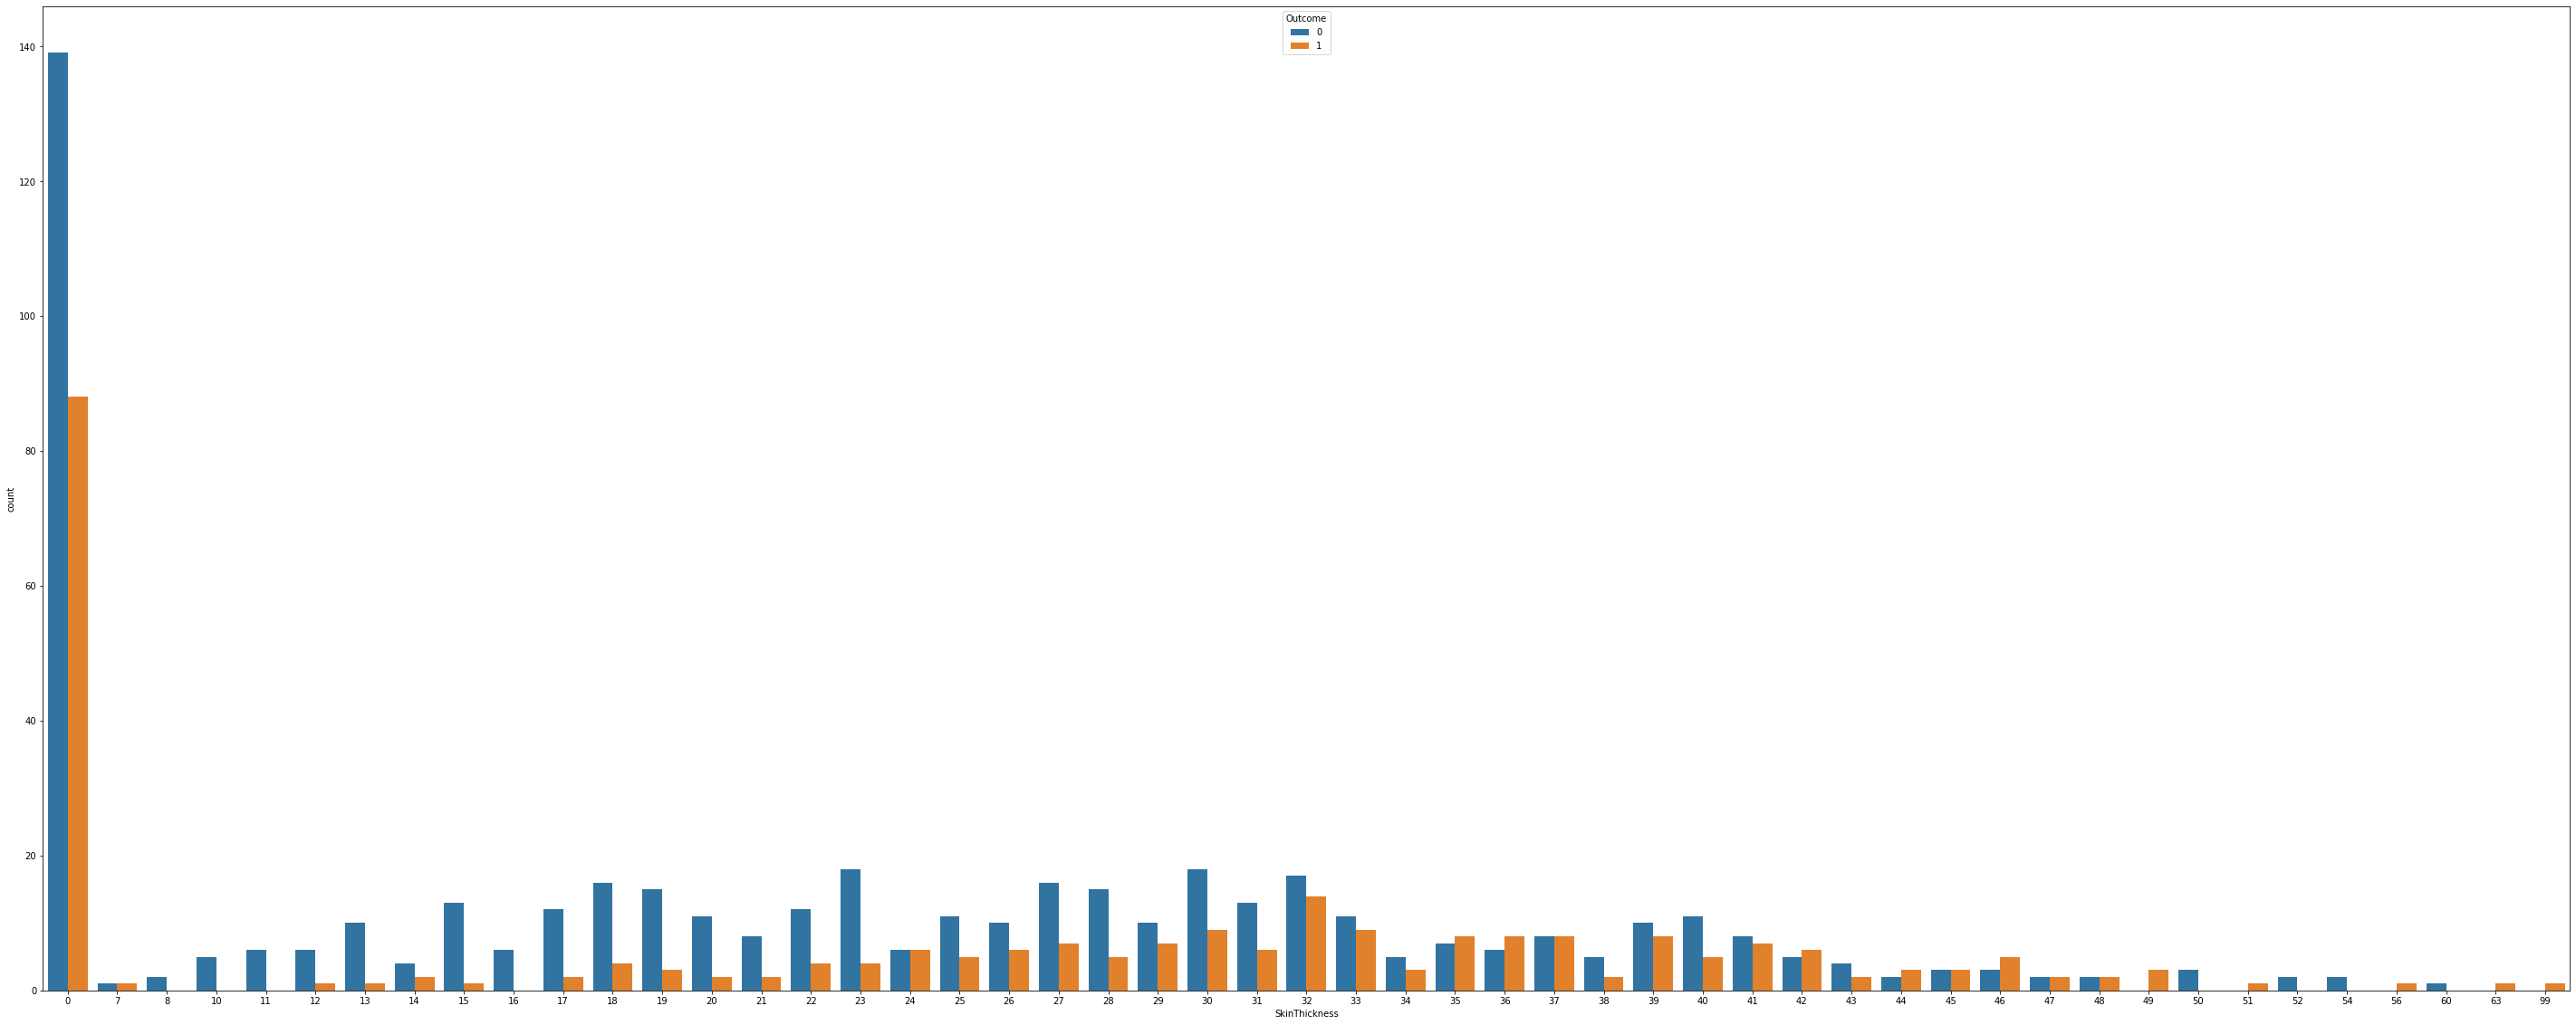

In [9]:
plt.figure(figsize=(50,20))
sns.countplot(db['SkinThickness'],hue=db["Outcome"])

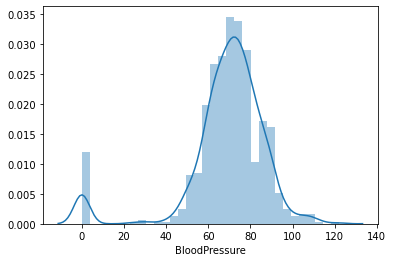

In [10]:
# Explaratory Data Analysis
sns.distplot(db['BloodPressure'])

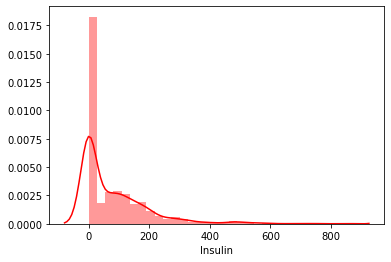

In [11]:
sns.distplot(db['Insulin'],color='red')

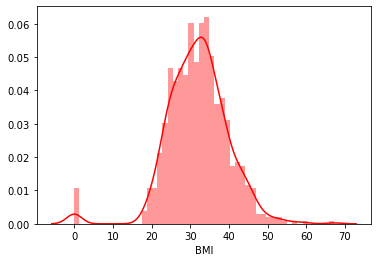

In [12]:
sns.distplot(db['BMI'],bins=50,color='red')

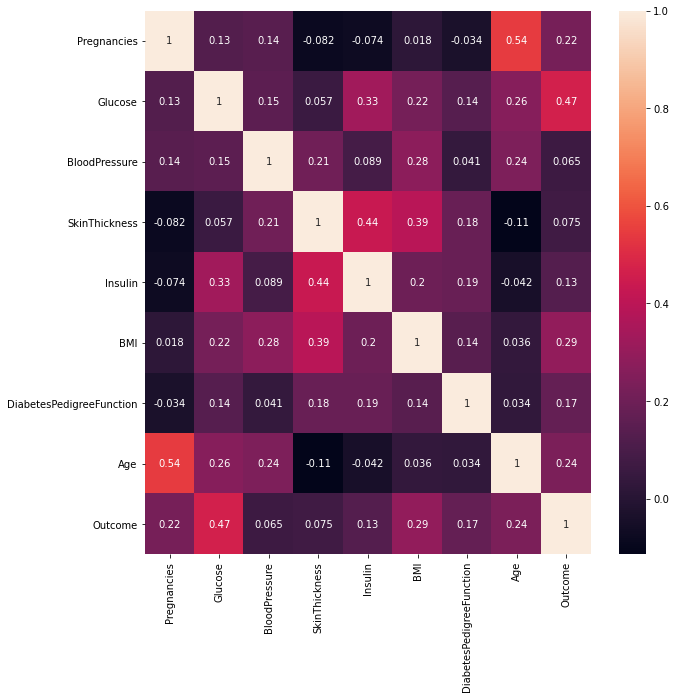

In [13]:
pi=plt.figure(figsize=(10,10))
sns.heatmap(db.corr(),annot=True)

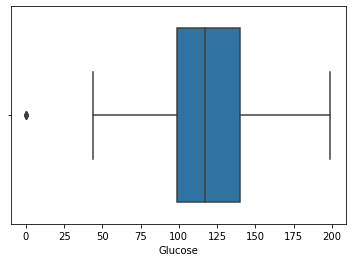

In [14]:
sns.boxplot(x='Glucose',data=db)

In [15]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(db)
db=pd.DataFrame(scaled)
db.head()

,0,1,2,3,4,5,6,7,8
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [17]:
List = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
db.columns=List
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

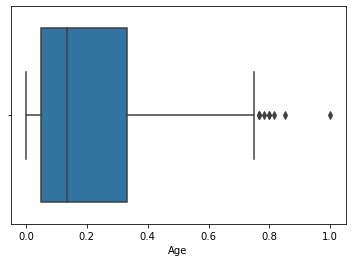

In [18]:
sns.boxplot(x='Age',data=db)

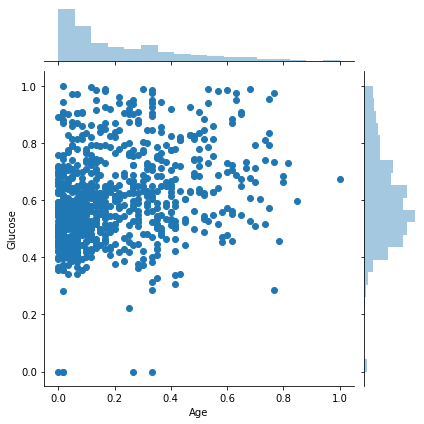

In [19]:
sns.jointplot(x='Age',y='Glucose',data=db)

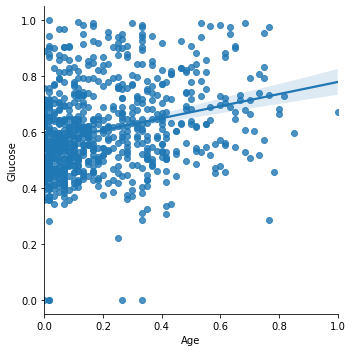

In [20]:
sns.lmplot(x='Age',y='Glucose',data=db)

In [37]:
X = db.iloc[:, :-1].values
y = db.iloc[:, -1].values

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)


[[0.52941176 0.44723618 0.50819672 ... 0.33532042 0.02732707 0.2       ]
 [0.05882353 0.59296482 0.47540984 ... 0.49627422 0.07813834 0.03333333]
 [0.         0.45728643 0.6557377  ... 0.4828614  0.22331341 0.1       ]
 ...
 [0.23529412 0.47236181 0.53278689 ... 0.3681073  0.02988898 0.        ]
 [0.64705882 0.42713568 0.60655738 ... 0.4485842  0.09479078 0.23333333]
 [0.29411765 0.68341709 0.67213115 ... 0.         0.23996584 0.8       ]]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 1.50755225 -1.01521454 -0.40451932 ... -1.22070104 -0.98325882
  -0.04863985]
 [-0.82986389 -0.09964691 -0.61509602 ...  0.13719053 -0.62493647
  -0.88246592]
 [-1.12204091 -0.95207195  0.54307587 ...  0.0240329   0.39884168
  -0.5489355 ]
 ...
 [ 0.04666716 -0.85735805 -0.24658679 ... -0.9440935  -0.96519215
  -1.04923114]
 [ 2.09190629 -1.14149973  0.2272108  ... -0.26514771 -0.5075031
   0.11812536]
 [ 0.33884418  0.46863645  0.64836422 ... -4.04964181  0.51627505
   2.953134  ]]
[[-0.82986389  2.4576282   0.33249916 ...  1.34420526  2.78665365
  -0.96584853]
 [-0.53768687 -0.44693118  0.2272108  ...  0.17490974 -0.19434743
  -0.88246592]
 [ 0.04666716 -1.42564141 -0.40451932 ...  0.22520202 -0.23349189
  -0.71570071]
 ...
 [-0.82986389 -0.38378859 -0.50980767 ... -0.85608201  1.4406865
  -1.04923114]
 [-0.24550986  0.21606607  0.43778751 ... -1.39672402 -0.60385869
   1.7857775 ]
 [ 0.33884418 -1.04678584  0.43778751 ... -0.57947447 -0.63396981
   0.28489057]]


In [24]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [25]:
# Predicting a new result
print(classifier.predict(sc.transform([[5,116,74,0,95,45.6,0.200,40]])))

[1.]


In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 

In [29]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[118  12]
 [ 26  36]]


0.8020833333333334

In [30]:
print('Accuracy is:', accuracy_score(y_test,y_pred)*100)
print('Precision is:', precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))

Accuracy is: 80.20833333333334
Precision is: 0.75
Recall is: 0.5806451612903226


In [ ]:
### The accuracy of the Logistic Regression is 80.2%

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dec= DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
dec.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [33]:
pred_decisiont=dec.predict(X_test)

In [34]:
print(confusion_matrix(y_test,pred_decisiont)) #Confusion_matrix

[[119  11]
 [ 40  22]]


In [35]:
print ("Accuracy :",accuracy_score(y_test,pred_decisiont)*100)

Accuracy : 73.4375


In [36]:
print("Report :",classification_report(y_test,pred_decisiont))

Report :               precision    recall  f1-score   support

         0.0       0.75      0.92      0.82       130
         1.0       0.67      0.35      0.46        62

    accuracy                           0.73       192
   macro avg       0.71      0.64      0.64       192
weighted avg       0.72      0.73      0.71       192



#### The decision tree model is of accuracy 73% .